# Clean and Analyze Data

Main Objective: Detect a trend in dissatisfaction of employees and gain a better understanding of the motive causing the dissatisfaction.

Use vectorized string methods to clean string columns:
1. apply(), map(), and applymap() methods: transform data
2. fillna(), dropna(), and drop() methods: drop missing or unnecessary values
3. melt() function: reshape data
4. concat() and merge() functions: combine data

In [ ]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [808]:
#load datasets
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

## Data exploration

In [809]:
#explore dete_survey dataset
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [810]:
#view first five rows of dete_survey dataset
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [811]:
#view the missing values (NaN) in dete_survey dataset
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

The columns in dete_survey dataset have 822 entries some columns have no null values while other columns have mostly null values and will be dropped later in the analysis. Two start date columns have 'Not Stated' instead of 'NaN' values which will need to be corrected before analyzing the data.

In [812]:
#explore tafe_survey dataset
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [813]:
#view first five rows of tafe_survey dataset
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [814]:
#view missing values (NaN) in the dete_survey dataset
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

The columns in tafe_survey dataset have 702 entries. Some columns have non-null values while other columns have missing or null values and will be imputed later in the analysis.

Both datasets have similar column names that should be changed so that they match.

In [815]:
#reload dete_survey dataset to replace 'Not Stated' by a missing value
dete_survey = pd.read_csv("dete_survey.csv", na_values='Not Stated')

In [816]:
#check that 'Not Stated' was replaced by a missing value
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [817]:
#drop columns that contain mostly missing values
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

## Reformat `dete_survey_updated column` names

In [818]:
#view column names 
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [819]:
#Reformat column names
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')

In [820]:
#view reformatted column names 
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [821]:
#check the current state of the dete_survey_updated dataframe
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


## Reformat `tafe_survey_updated` column names

Rename column names of the updated dataframe so that all column names will have a uniform format.

In [822]:
#view column names 
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

In [823]:
#Reformat column names
tafe_survey_updated.rename(columns={'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 
                            'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
                            'Employment Type. Employment Type': 'employment_status',
                            'Classification. Classification': 'position',
                            'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                            'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'                                    
                           }, inplace=True)

In [824]:
#view reformatted column names 
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [825]:
#check the current state of the tafe_survey_updated dataframe
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Review the unique values of the `separationtype` column

In [826]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [827]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

## Filtering the dataframes to have only the `'Registration' separationtype`

In [828]:
#create string variable
d_pattern = 'Resignation'
#search for variable within dataframe
#copy resulting boolean dataframe
dete_survey_updated_bool = dete_survey_updated['separationtype'].str.contains(d_pattern).copy()
#check the boolean dataframe
dete_survey_updated_bool.value_counts()

False    511
True     311
Name: separationtype, dtype: int64

In [829]:
#use boolean dataframe to select only the rows with 'Resignation' as the 'separationtype'
dete_resignations = dete_survey_updated[dete_survey_updated_bool]
#check dataframe has 311 entries
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
id                                     311 non-null int64
separationtype                         311 non-null object
cease_date                             300 non-null object
dete_start_date                        283 non-null float64
role_start_date                        271 non-null float64
position                               308 non-null object
classification                         161 non-null object
region                                 265 non-null object
business_unit                          32 non-null object
employment_status                      307 non-null object
career_move_to_public_sector           311 non-null bool
career_move_to_private_sector          311 non-null bool
interpersonal_conflicts                311 non-null bool
job_dissatisfaction                    311 non-null bool
dissatisfaction_with_the_department    311 non-null bool
physical_work_enviro

In [830]:
#check for missing values in 'separationtype' column
tafe_survey_updated["separationtype"].isnull().sum()

1

In [831]:
#remove missing value in 'separationtype' column
tafe_survey_updated = tafe_survey_updated.dropna(subset=["separationtype"])
#check for missing values in 'separationtype' column
tafe_survey_updated["separationtype"].isnull().sum()

0

In [832]:
#create string variable
t_pattern = 'Resignation'
#search for variable within dataframe
#copy resulting boolean dataframe
tafe_survey_updated_bool = tafe_survey_updated['separationtype'].str.contains(t_pattern).copy()
#check the boolean dataframe
tafe_survey_updated_bool.value_counts()

False    361
True     340
Name: separationtype, dtype: int64

In [833]:
#use boolean dataframe to select only the rows with 'Resignation' as the 'separationtype'
tafe_resignations = tafe_survey_updated[tafe_survey_updated_bool]
#check dataframe has 340 entries
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
id                                                     340 non-null float64
Institute                                              340 non-null object
WorkArea                                               340 non-null object
cease_date                                             335 non-null float64
separationtype                                         340 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Self-employment    332 non-null object
Contributing Factors. Ill Health                       332 non-null object
Contributing Factors. Maternity/Family                 332 non-null object
Contributing Factors. Dissatisfaction                  332 non-null object
Contributing Factors. Job Dissatisfaction              332 non-null 

## Check the years in each dataframe for logical inconsistencies

The `dete_start_date` is the person's first year of employment.
The `cease_date` is the last year of the person's employment. It wouldn't make sense to have years before the `dete_start_date` or after the `cease_date`.

Let's check that the `dete_start_date` series for the `dete_resignations` dataframe is in the correct format.

In [834]:
#view unique years in 'dete_start_year' series in 'dete_resignations' dataframe
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

Let's check that the `cease_date` series for the `dete_resignations` dataframe is in the correct format.

In [835]:
#view unique years in 'cease_year' series in 'dete_resignations' dataframe
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
2010         1
07/2012      1
07/2006      1
Name: cease_date, dtype: int64

In [836]:
#Use vectorized string method to extract the year from the 'cease_year' series in 'dete_resignations' dataframe
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r'([0-9][0-9][0-9][0-9])').astype('float')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [837]:
#check the years in 'cease_year' series in 'dete_resignations' dataframe
dete_resignations['cease_date'].value_counts().sort_index(ascending=True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

Let's check that the `cease_date` series for the `tafe_resignations` dataframe is in the correct format.

In [838]:
#view unique years in 'cease_date' series in 'tafe_resignations' dataframe
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

By comparing the `dete_start_date` and `cease_date` columns in the `dete_resignations`dataframe, only four years(2006, 2010, 2012, 2013) are present in both columns which is very little overlap between the start and end of employment years.

## Investigate employee satisfaction with the company based on years of service

In [839]:
#create a new column for years of service 
#calculate years of service per employee
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



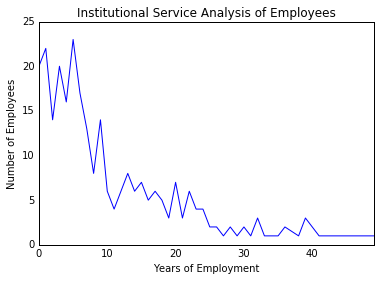

In [840]:
#Show relationship between years of service vs number of employees
dete_resignations['institute_service'].value_counts().sort_index(ascending=True).plot.line()
#display plot
plt.title("Institutional Service Analysis of Employees")
plt.ylabel("Number of Employees")
plt.xlabel("Years of Employment")
plt.tick_params(bottom="off", top="off", left="off", right="off")
plt.show()

The line graph demonstrates a trend that the company is experiencing moderate turn off which indicates that the employees may become dissatisified the longer they work at the company.

## Evaluate employee dissatisfaction

Evaluate if the employee was disatisfied based these factors.

1. `tafe_survey_updated`:
* `Contributing Factors. Dissatisfaction`
* `Contributing Factors. Job Dissatisfaction`

2. `dete_survey_updated`:
* `job_dissatisfaction`
* `dissatisfaction_with_the_department`
* `physical_work_environment`
* `lack_of_recognition`
* `lack_of_job_security`
* `work_location`
* `employment_conditions`
* `work_life_balance`
* `workload`

Let's work on the `tafe_resignations` dataframe!

In [841]:
#number of missing values in the 'Contributing Factors. Dissatisfaction' column 
tafe_resignations['Contributing Factors. Dissatisfaction'].isnull().sum()

8

In [842]:
#view unique values
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

The `Contributing Factors. Dissatisfaction` column has 8 missing values that are not being detected by the value_counts() method.

In [843]:
#number of missing values in the 'Contributing Factors. Job Dissatisfaction' column 
tafe_resignations['Contributing Factors. Job Dissatisfaction'].isnull().sum()

8

In [844]:
#view unique values
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

The `Contributing Factors. Job Dissatisfaction` column has 8 missing values that are not being detected by the value_counts() method.

In [845]:
#create custom function
def replace_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == '-':
        return False
    else:
        return True

#Implement the custom function on each series
tafe_resignations["dissatisfied"] = tafe_resignations[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]].applymap(replace_vals).any(axis=1, skipna=False)


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [846]:
#make a copy
tafe_resignations_up = tafe_resignations.copy()
#print out the three types of entries
tafe_resignations_up["dissatisfied"].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

Let's work on the `dete_resignations` dataframe!

In [847]:
#create custom function
def replace_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == '-':
        return False
    else:
        return True

#list of column names
cols = ['job_dissatisfaction', 'dissatisfaction_with_the_department',
'physical_work_environment', 'lack_of_recognition',
'lack_of_job_security', 'work_location',
'employment_conditions', 'work_life_balance', 'workload']

#Implement the custom function on the series
dete_resignations['dissatisfied'] = dete_resignations[cols].any(axis=1, skipna=False)


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [848]:
#make a copy
dete_resignations_up = dete_resignations.copy()
#print out the three types of entries
dete_resignations_up["dissatisfied"].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combine the two datasets

In [849]:
#add 'DETE' suffix to 'dete_resignations_up' dataframe
dete_resignations_up = dete_resignations_up.add_suffix('_DETE')

In [850]:
#add 'TAFE' suffix to 'tafe_resignations_up' dataframe
tafe_resignations_up = tafe_resignations_up.add_suffix('_TAFE')

In [851]:
#merge two dataframes into one dataframe
combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis=1)

## Clean the `institute_service` column

Columns can be dropped based on a threshold value. An example showing how to do that is given in commented-out code below.

In [852]:
#drop columns with less than 1000 non-null values
#combined_updated = combined.dropna(thresh=1000, axis=1)

In [853]:
#copy the combined dataframe and save as combined_updated
combined_updated = combined.copy()

In [854]:
#change 'institute_service' series to type 'string'
#search 'institute_service' series for a character in the range 0-9
#and may appear one or more times then
#change 'institute_service' series to type 'float'
combined_updated['institute_service_DETE_updated'] = combined_updated['institute_service_DETE'].astype('str').str.extract(r'(\d+)').astype('float')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:5: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



In [855]:
#change 'institute_service' series to type 'string'
#search 'institute_service' series for a character in the range 0-9
#and may appear one or more times then
#change 'institute_service' series to type 'float'
combined_updated['institute_service_TAFE_updated'] = combined_updated['institute_service_TAFE'].astype('str').str.extract(r'(\d+)').astype('float')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:5: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



## Categorize the `institute_service` column

Create a custom function to categorize the values in the`institute_service` column using the criteria below:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

In [856]:
#create a custom function
def service_cat(val):
    if val < 3:
        return 'New'
    elif 3 >= val <6:
        return 'Experienced'
    elif 7 >= val < 10:
        return 'Established'
    elif val >= 11:
        return 'Veteran'
    elif pd.isnull(val):
        return np.nan  


In [857]:
#convert numbers into labels within the 'institute_service' columns
combined_updated['service_cat_DETE'] = combined_updated['institute_service_DETE_updated'].apply(service_cat)

In [858]:
combined_updated['service_cat_TAFE'] = combined_updated['institute_service_TAFE_updated'].apply(service_cat)

The `service_cat` columns categorizes employees according to the amount of years spent at the company.

In [859]:
combined_updated['service_cat_DETE'].value_counts()

Veteran        100
Established     69
New             56
Experienced     20
Name: service_cat_DETE, dtype: int64

In [860]:
combined_updated['service_cat_TAFE'].value_counts()

New            137
Experienced     63
Established     54
Veteran         36
Name: service_cat_TAFE, dtype: int64

## Compare Service Categories for two different locations

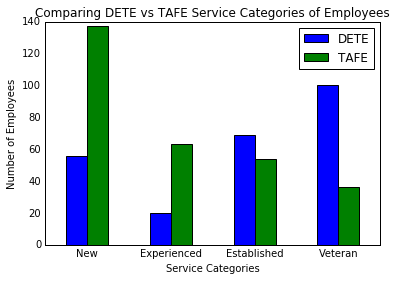

In [876]:
#create and plot a dataframe to compare the dete and tafe dataframes
dete = [56, 20, 69, 100]
tafe = [137, 63, 54, 36]
index = ['New', 'Experienced', 'Established',
         'Veteran']
df = pd.DataFrame({'TAFE': tafe,
                   'DETE': dete}, index=index)
df.plot.bar(rot=0)
plt.title('Comparing DETE vs TAFE Service Categories of Employees')
plt.ylabel("Number of Employees")
plt.xlabel("Service Categories")
plt.tick_params(bottom="off", top="off", left="off", right="off")

Some locations may be retaining more veteran employees than other locations.

## Replace missing values

Remove missing values for `DETE` dataframe.

In [867]:
combined_updated['dissatisfied_DETE'].value_counts(dropna=False)

NaN      201
False    162
True     149
Name: dissatisfied_DETE, dtype: int64

In [868]:
#replace NaN values with the most numerous in the column which is 'False'
combined_updated['dissatisfied_DETE'] = combined_updated['dissatisfied_DETE'].fillna(value=False)

In [869]:
combined_updated['dissatisfied_DETE'].value_counts(dropna=False)

False    363
True     149
Name: dissatisfied_DETE, dtype: int64

Remove missing values for `TAFE` dataframe.

In [870]:
combined_updated['dissatisfied_TAFE'].value_counts(dropna=False)

False    241
NaN      180
True      91
Name: dissatisfied_TAFE, dtype: int64

In [871]:
#replace missing values with the most numerous in the column which is 'False'
combined_updated['dissatisfied_TAFE'] = combined_updated['dissatisfied_TAFE'].fillna(value=False)

In [872]:
combined_updated['dissatisfied_TAFE'].value_counts(dropna=False)

False    421
True      91
Name: dissatisfied_TAFE, dtype: int64

## Compare dissatified vs satisfied employees at two locations

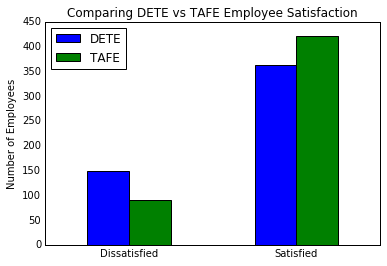

In [877]:
#create and plot a dataframe to compare the dete and tafe dataframes
t = [91, 421]
d = [149, 363]
index = ['Dissatisfied', 'Satisfied']
df = pd.DataFrame({'TAFE': t,
                   'DETE': d}, index=index)
df.plot.bar(rot=0)
plt.title('Comparing DETE vs TAFE Employee Satisfaction')
plt.ylabel("Number of Employees")
plt.tick_params(bottom="off", top="off", left="off", right="off")

Dissatisfaction is not the cause of the decline in veteran employees; since there are less veteran employees but more satisfied employees at the TAFE location.